# <center> NIRS <center> PLOTS

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df0 = pd.read_excel('Datasets/Lucas/dados_nirs_lucas.xlsx')
df = df0

In [4]:
X = df.loc[:, '12493.238':].to_numpy()
wl = df.loc[:, '12493.238':].columns.map(float).to_numpy()
 
Xmsc = msc(X)[0] # Take the first element of the output tuple
Xsnv = snv(X)
 
## Plot spectra
plt.figure(figsize=(12,13))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(311)
    plt.plot(wl, X.T)
    plt.title('Original data')
 
    ax2 = plt.subplot(312)
    plt.plot(wl, Xmsc.T)
    plt.ylabel('Absorbance spectra')
    plt.title('MSC')
 
    ax2 = plt.subplot(313)
    plt.plot(wl, Xsnv.T)
    plt.xlabel('Wavelength (cm-¹)')
    plt.title('SNV')
    plt.show()


NameError: name 'df' is not defined

In [30]:
df.loc[:, '12493.238':] = Xmsc

In [10]:
#Reset
df = df0

# Transform all feautere names to string
df.columns = df.columns.map(str)

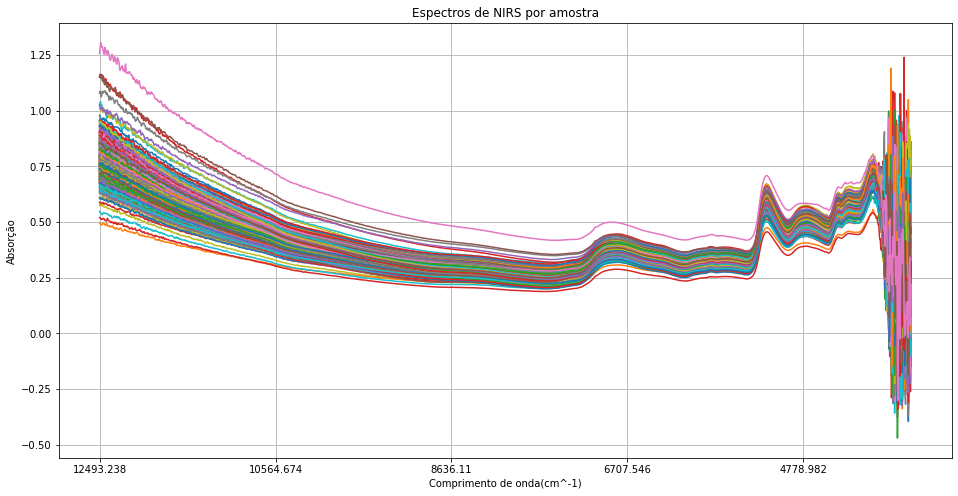

In [11]:
for i in range(0, df.shape[0]):
    df.loc[i, '12493.238':].plot(kind='line', figsize=(16,8))


plt.ylabel("Absorção")
plt.xlabel("Comprimento de onda(cm^-1)")
plt.grid(visible=True)
plt.title("Espectros de NIRS por amostra")
plt.show()

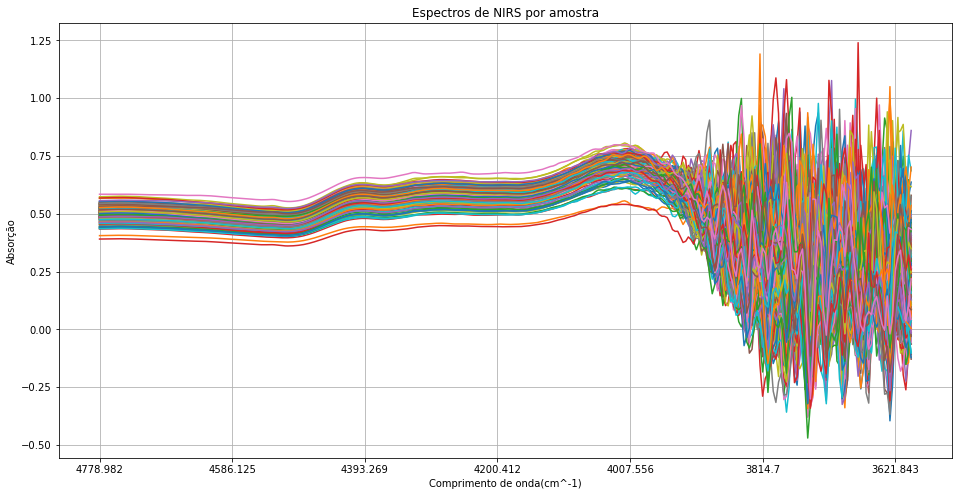

In [12]:
for i in range(0, df.shape[0]):
    df.loc[i, '4778.982':].plot(kind='line', figsize=(16,8))


plt.ylabel("Absorção")
plt.xlabel("Comprimento de onda(cm^-1)")
plt.grid(visible=True)
plt.title("Espectros de NIRS por amostra")
plt.show()

In [13]:
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''
 
    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
    # Get the reference spectrum. If not given, estimate it from the mean    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
 
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
 
    return (data_msc, ref)

In [14]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

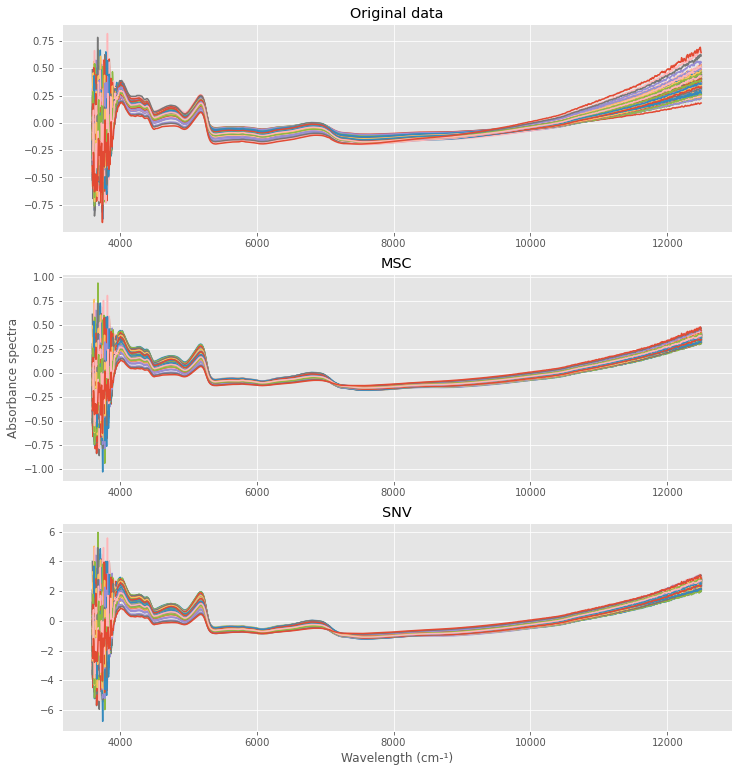

In [29]:
X = df.loc[:, '12493.238':].to_numpy()
wl = df.loc[:, '12493.238':].columns.map(float).to_numpy()
 
Xmsc = msc(X)[0] # Take the first element of the output tuple
Xsnv = snv(X)
 
## Plot spectra
plt.figure(figsize=(12,13))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(311)
    plt.plot(wl, X.T)
    plt.title('Original data')
 
    ax2 = plt.subplot(312)
    plt.plot(wl, Xmsc.T)
    plt.ylabel('Absorbance spectra')
    plt.title('MSC')
 
    ax2 = plt.subplot(313)
    plt.plot(wl, Xsnv.T)
    plt.xlabel('Wavelength (cm-¹)')
    plt.title('SNV')
    plt.show()


In [30]:
df.loc[:, '12493.238':] = Xmsc

In [31]:
df.loc[:, '12493.238':]

,12493.238,12489.381,12485.523,12481.666,12477.809,12473.952,12470.095,12466.238,12462.381,12458.523,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
0,0.338887,0.337404,0.335443,0.335247,0.336444,0.333604,0.326698,0.325689,0.332702,0.337602,...,-0.120615,-0.028346,0.015151,-0.035277,0.001756,0.042869,-0.126856,-0.054212,0.194937,0.271425
1,0.317095,0.320266,0.321250,0.319248,0.315396,0.313447,0.314053,0.314317,0.313507,0.311880,...,-0.068610,0.053846,0.017839,-0.186236,-0.309471,-0.284121,-0.212443,-0.163100,-0.189997,-0.292488
2,0.360949,0.361718,0.359546,0.354039,0.348763,0.345865,0.345525,0.347879,0.348904,0.347686,...,0.234205,0.255801,0.113953,-0.046218,-0.198215,-0.275446,-0.301679,-0.317741,-0.307883,-0.376881
3,0.335939,0.336542,0.330664,0.320849,0.317556,0.324600,0.331027,0.329307,0.328042,0.332662,...,-0.377033,-0.162298,-0.118439,-0.226354,-0.225058,-0.180281,-0.184551,-0.129775,-0.056487,-0.090665
4,0.344096,0.341529,0.341550,0.339287,0.333301,0.330445,0.332568,0.336365,0.340025,0.341583,...,0.213248,0.226640,0.143772,-0.055786,-0.186720,-0.123511,-0.114767,-0.115573,-0.139653,-0.195598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.394951,0.393906,0.396826,0.398441,0.394113,0.389951,0.388529,0.388851,0.388731,0.384218,...,-0.361582,-0.443829,-0.374267,-0.308894,-0.218639,-0.090970,0.025655,0.012756,-0.115693,-0.219043
263,0.412321,0.411804,0.410117,0.408329,0.406577,0.405138,0.402313,0.396343,0.392688,0.396018,...,-0.435196,-0.623396,-0.457422,-0.145533,-0.004216,-0.043032,-0.089567,-0.137645,-0.078528,-0.134289
264,0.410309,0.405058,0.399985,0.400144,0.402603,0.400273,0.391599,0.384472,0.387434,0.395142,...,-0.397215,-0.610823,-0.474708,-0.333534,-0.247955,-0.174170,-0.134894,-0.177102,-0.231477,-0.259748
265,0.388243,0.387158,0.385595,0.385217,0.389059,0.389895,0.384096,0.382839,0.387013,0.385438,...,-0.449603,-0.551363,-0.469762,-0.271086,-0.047986,0.105664,0.026392,-0.197232,-0.295307,-0.306919
